In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Display settings
pd.set_option('display.max_columns', None)
sns.set(style="whitegrid")


In [2]:
df = pd.read_csv("Titanic-Dataset (1).csv")   # <-- change file name
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
print("=== Dataset Shape ===")
print(df.shape)

print("\n=== Column Info ===")
print(df.info())

print("\n=== Missing Values ===")
print(df.isnull().sum())


=== Dataset Shape ===
(891, 12)

=== Column Info ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None

=== Missing Values ===
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket    

In [4]:
print("=== Summary Statistics (Numeric Columns) ===")
print(df.describe())

print("\n=== Summary Statistics (Categorical Columns) ===")
print(df.describe(include='object'))


=== Summary Statistics (Numeric Columns) ===
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  

=== Summary Statistics (Categorical

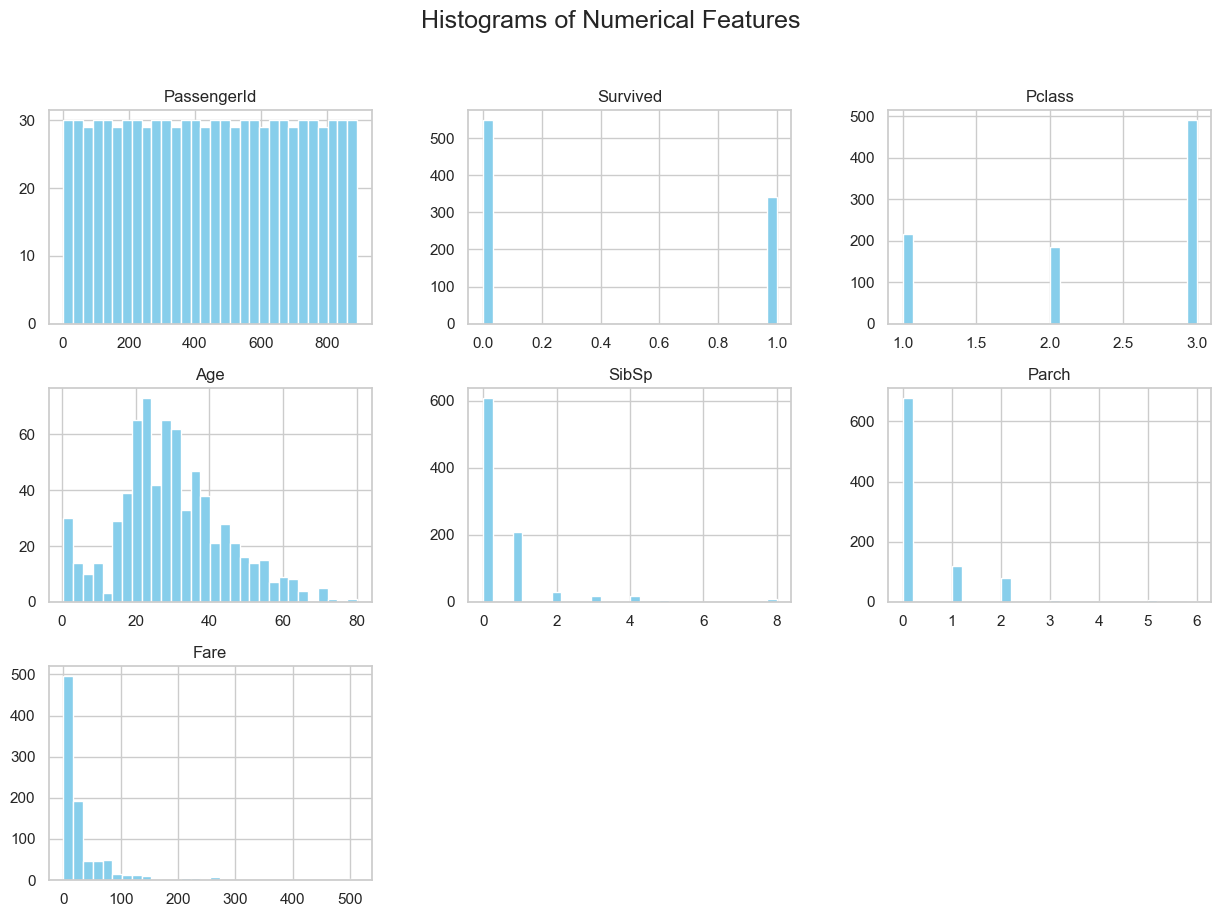

In [5]:
df.hist(figsize=(15, 10), bins=30, color='skyblue')
plt.suptitle("Histograms of Numerical Features", fontsize=18)
plt.show()


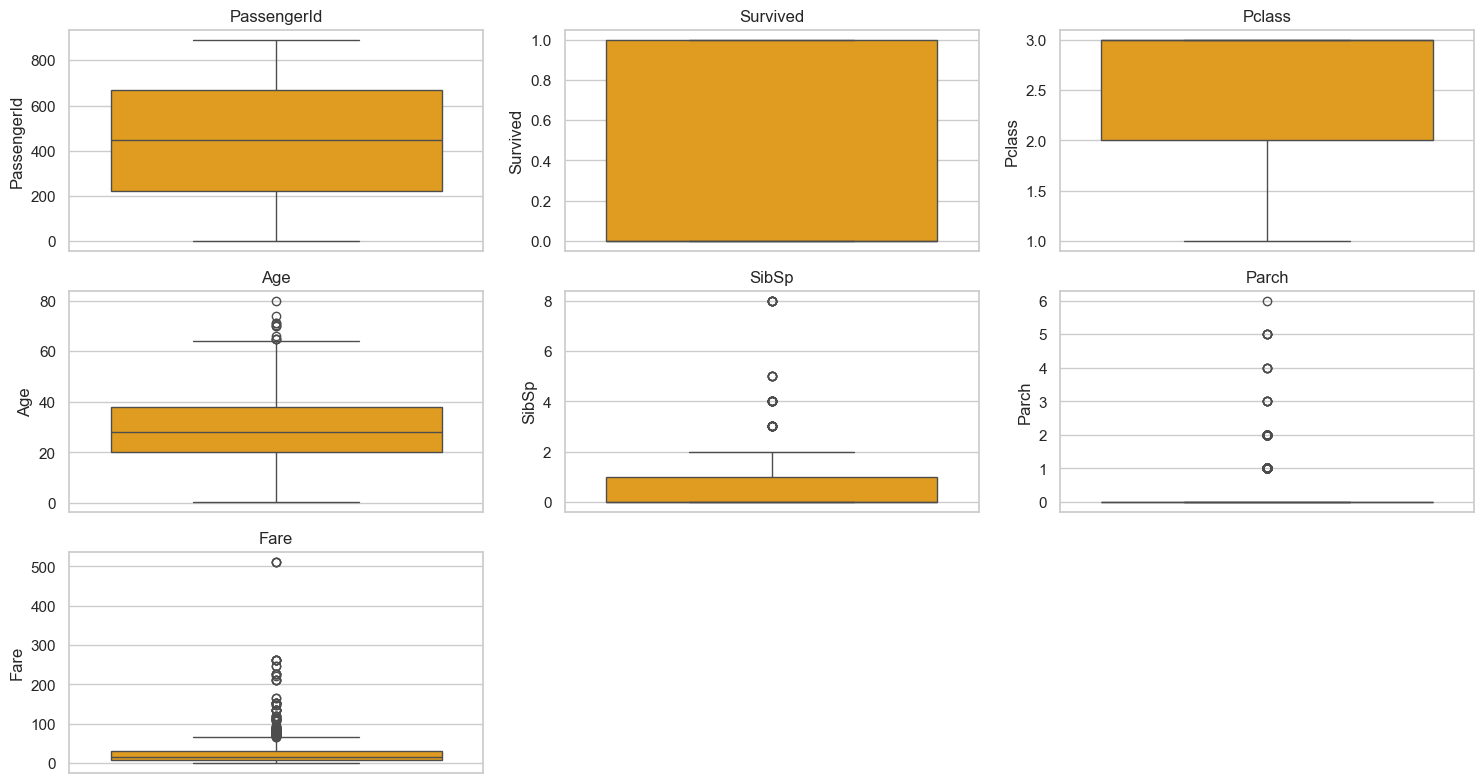

In [6]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

plt.figure(figsize=(15, 8))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(df[col], color='orange')
    plt.title(col)

plt.tight_layout()
plt.show()


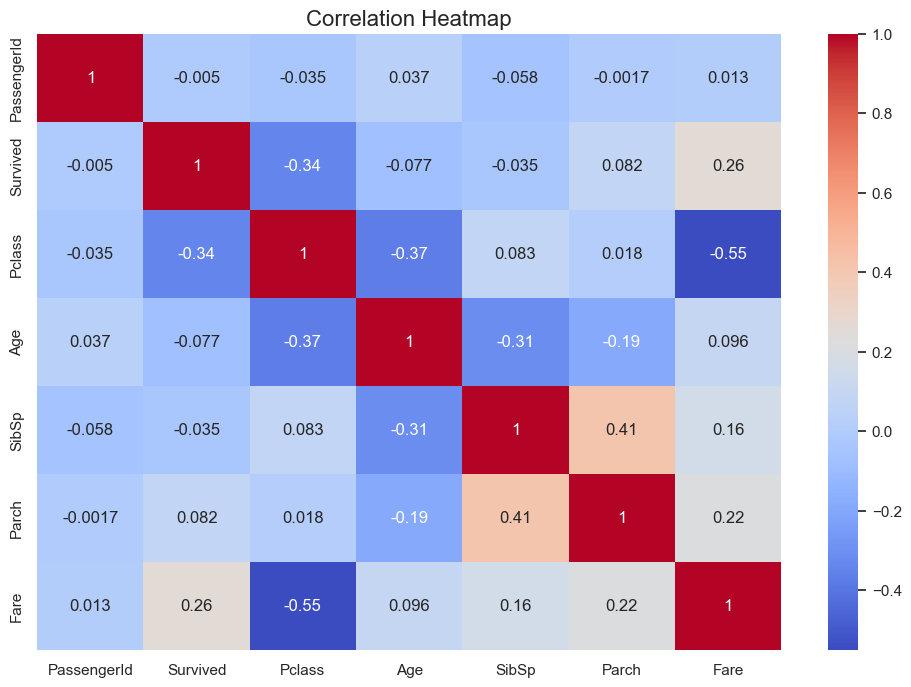

In [8]:
plt.figure(figsize=(12, 8))

# Select only numeric columns
numeric_df = df.select_dtypes(include=['int64', 'float64'])

corr = numeric_df.corr()

sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap", fontsize=16)
plt.show()


In [11]:
print(df.select_dtypes(include=['int64', 'float64']).columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')


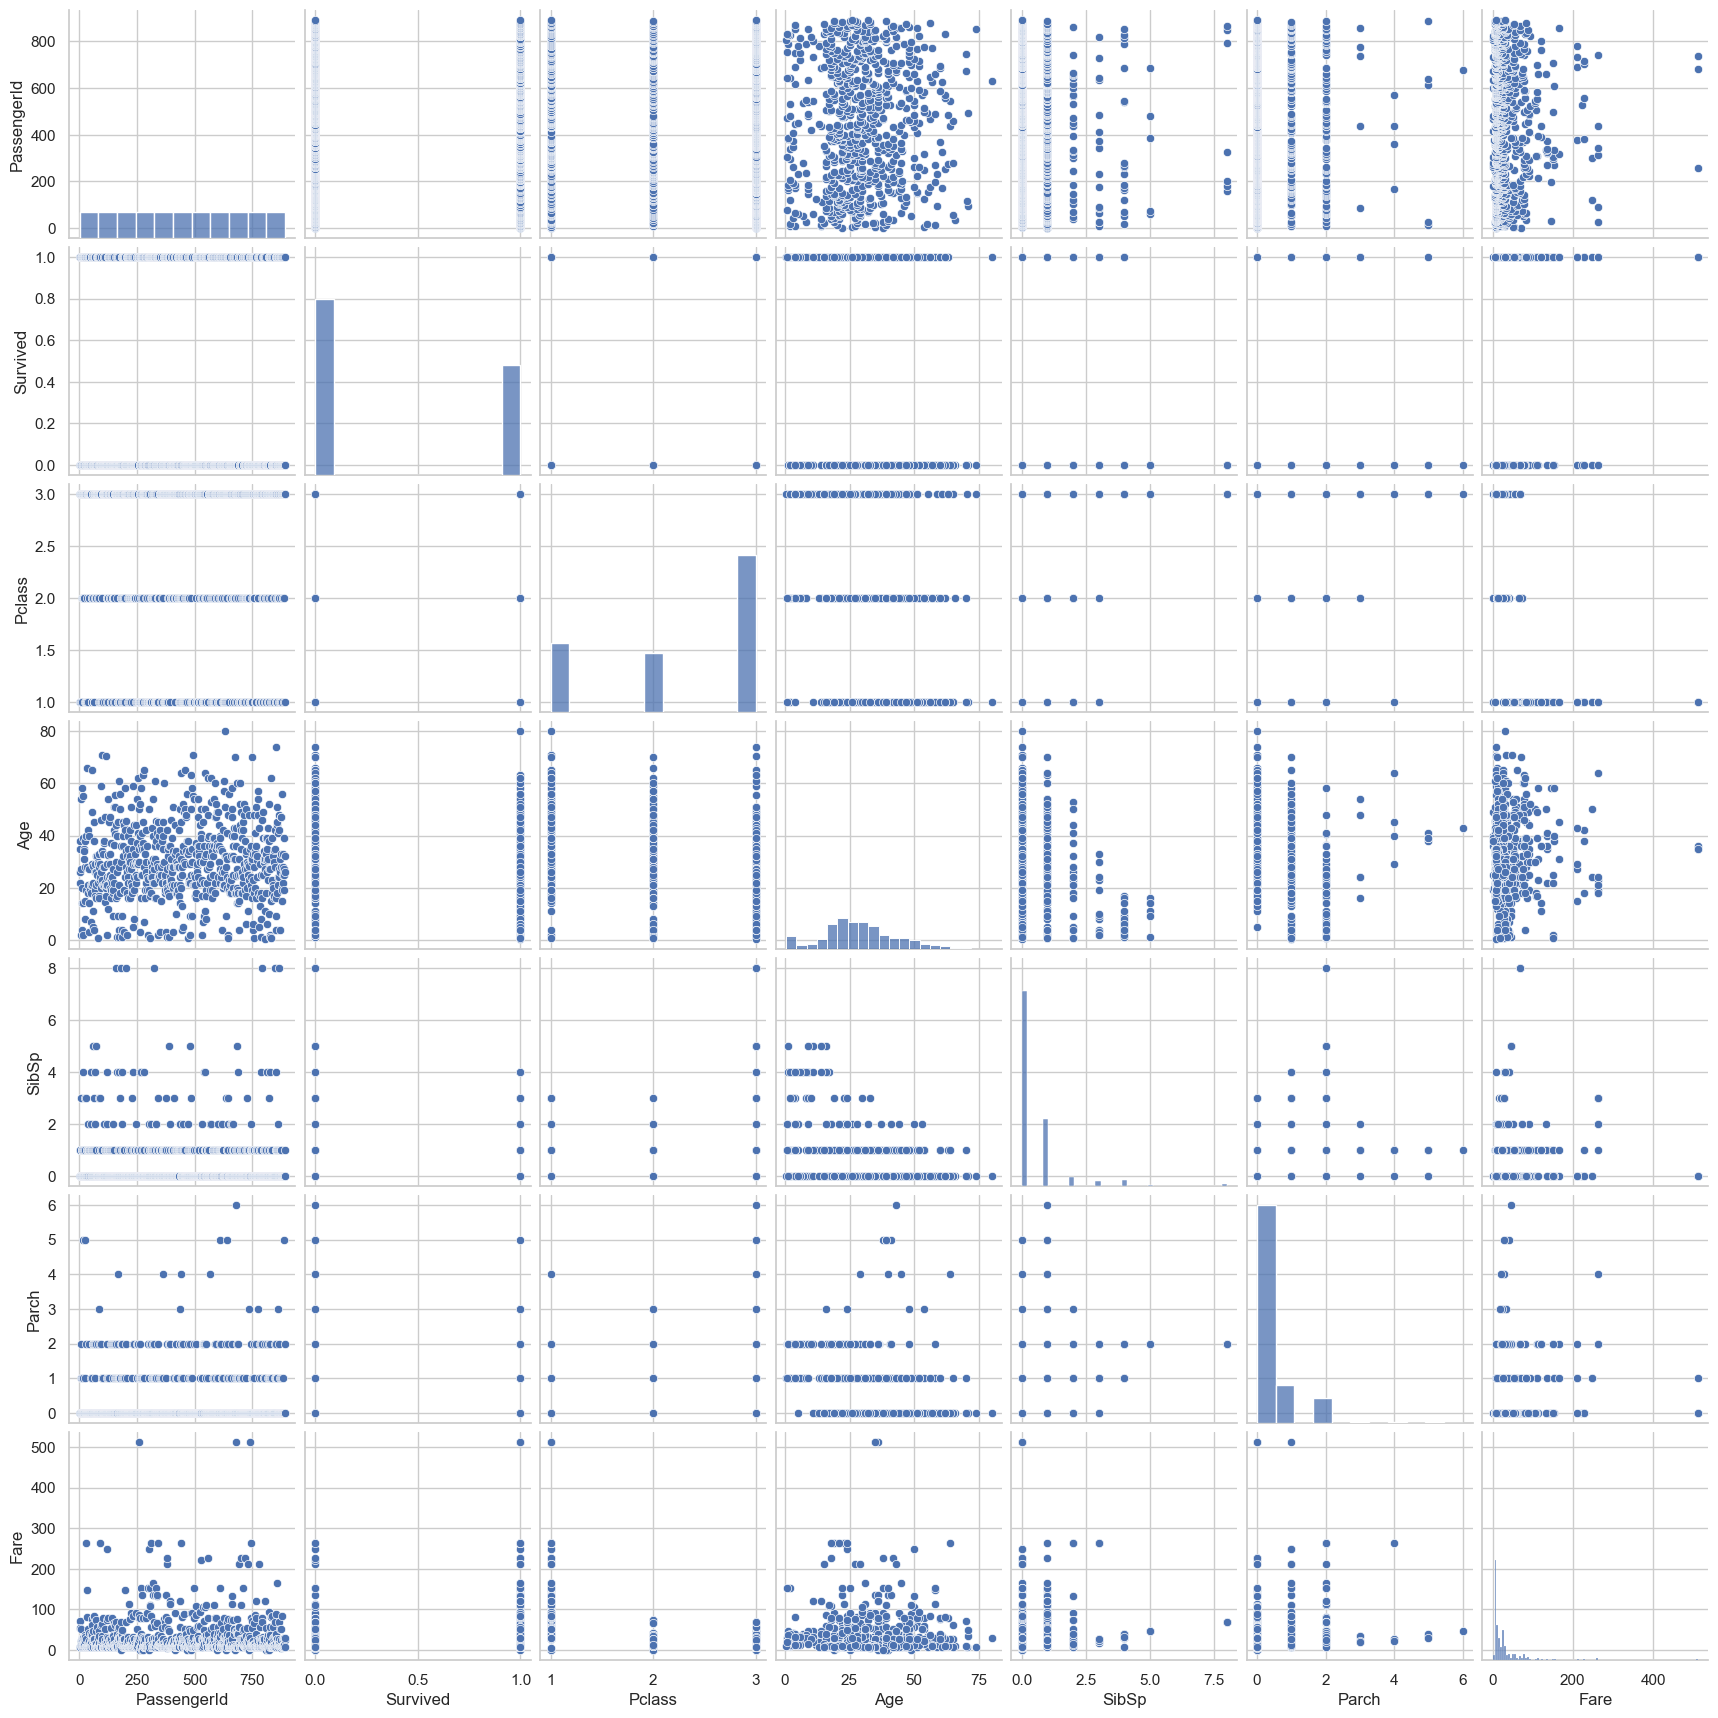

In [12]:
sns.pairplot(df.select_dtypes(include=['float64', 'int64']))
plt.show()


In [13]:
categorical_cols = df.select_dtypes(include=['object']).columns

for col in categorical_cols:
    print(f"\n=== Value Counts for {col} ===")
    print(df[col].value_counts())



=== Value Counts for Name ===
Name
Braund, Mr. Owen Harris                     1
Boulos, Mr. Hanna                           1
Frolicher-Stehli, Mr. Maxmillian            1
Gilinski, Mr. Eliezer                       1
Murdlin, Mr. Joseph                         1
                                           ..
Kelly, Miss. Anna Katherine "Annie Kate"    1
McCoy, Mr. Bernard                          1
Johnson, Mr. William Cahoone Jr             1
Keane, Miss. Nora A                         1
Dooley, Mr. Patrick                         1
Name: count, Length: 891, dtype: int64

=== Value Counts for Sex ===
Sex
male      577
female    314
Name: count, dtype: int64

=== Value Counts for Ticket ===
Ticket
347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: count, Length: 681, dtype: int64

=== Value Counts for Cabin ===
Cabin
B96 B98        4
G6             4
C23 C25 C27    4
C22 C26  

In [14]:
df.to_csv("EDA_processed_dataset.csv", index=False)
print("Saved cleaned dataset as EDA_processed_dataset.csv")


Saved cleaned dataset as EDA_processed_dataset.csv
